# Data Exploration  

This notebook helps us to generate important visualizations around the climate data which was extracted based on daily readings obtained from a rainfall guage in Louisina State of USA

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

In [2]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
os.chdir(os.path.dirname(os.path.dirname(dir_path)))
os.getcwd()

'C:\\Users\\manash.jyoti.konwar\\Documents\\AI_Random_Projects\\Research-Catastrophic-Detection'

In [3]:
weather_data = pd.read_csv(r'rainfall_prediction\data\jennings_ghcnd.csv', parse_dates=['DATE'])
weather_data = weather_data[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'EVAP',
            'MNPN', 'MXPN', 'PRCP', 'SN32', 'SN52', 'SNOW', 'SNWD', 'SX52', 'TMAX',
            'TMIN', 'TOBS', 'WDMV']]
weather_data.shape

(4473, 19)

In [4]:
weather_data['YEAR'] = weather_data['DATE'].apply(lambda x: x.year)
weather_data['MONTH'] = weather_data['DATE'].apply(lambda x: x.month)
weather_data['PRCP_mm'] = weather_data['PRCP'].apply(lambda x: x*25.4)

## Visualizing key parameter vs time  
The aim here is to visualize teh variation in precipitation obtained and plot those data points wrt time

In [5]:
data_plotting = weather_data.loc[weather_data.YEAR.isin([2020, 2021])].reset_index(drop=True)
# data_plotting = weather_data.copy()
data_plotting['ROLLING_PRCP_90_mm'] = data_plotting.PRCP_mm.rolling(90).mean()
data_plotting['ROLLING_PRCP_180_mm'] = data_plotting.PRCP_mm.rolling(180).std()

In [6]:
# Plotting Data
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', color='red', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    # plt.plot(x, y, color='tab:red')
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

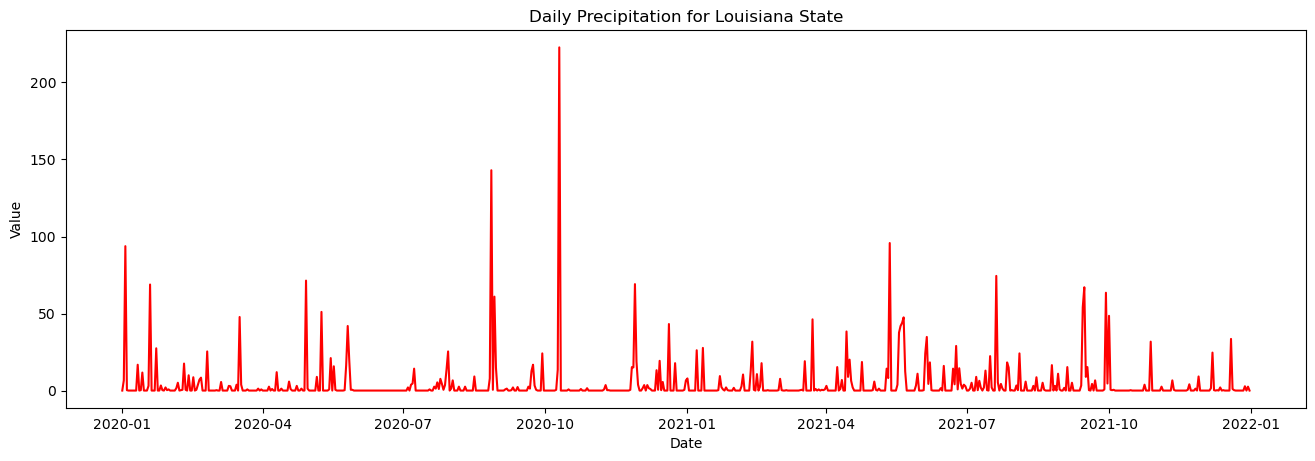

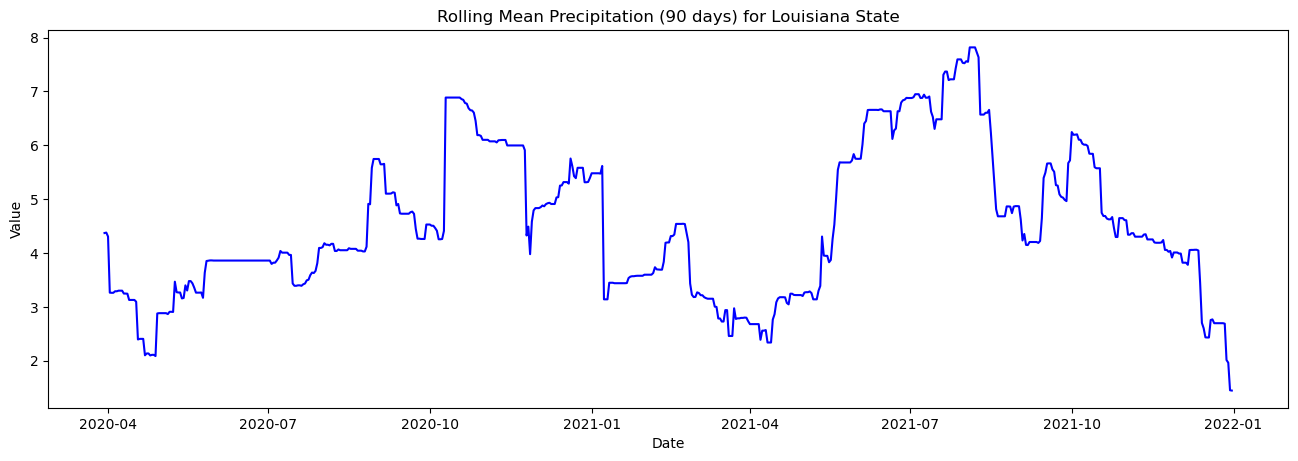

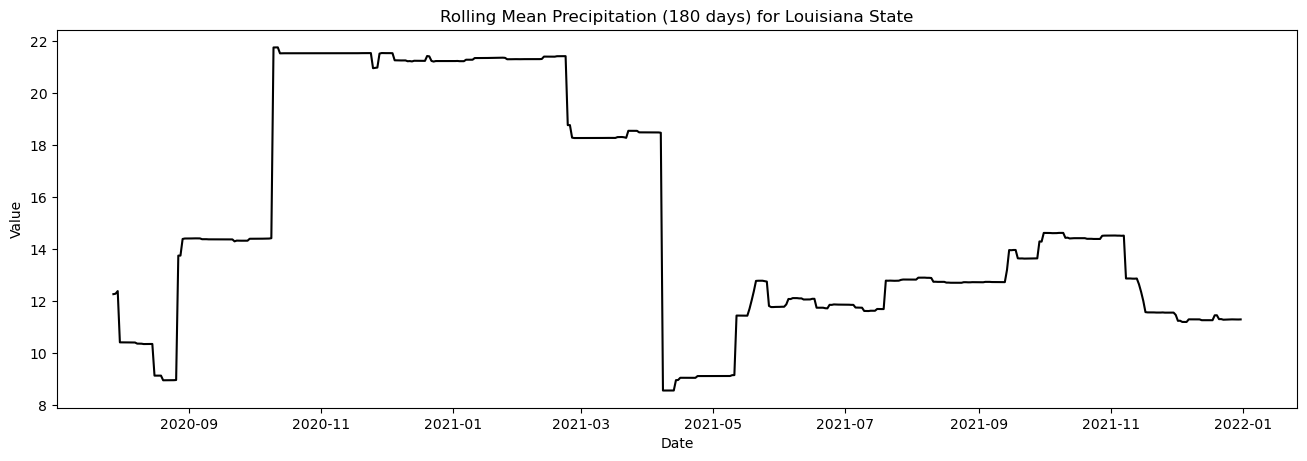

In [7]:
plot_df(data_plotting, x=data_plotting.DATE, y=data_plotting.PRCP_mm, color='red', title='Daily Precipitation for Louisiana State')   
plot_df(data_plotting, x=data_plotting.DATE, y=data_plotting.ROLLING_PRCP_90_mm, color='blue', title='Rolling Mean Precipitation (90 days) for Louisiana State') 
plot_df(data_plotting, x=data_plotting.DATE, y=data_plotting.ROLLING_PRCP_180_mm, color='black', title='Rolling Mean Precipitation (180 days) for Louisiana State')    

## Test Stationarity
Link to statsmodel ADF test: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [8]:
# Test Stationarity using ADF method
def perform_adf_test(df):
    adft = adfuller(df,autolag="AIC")
    output_df = pd.DataFrame(
                    {"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], 
                    "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                            "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
    return output_df

In [9]:
data_plotting['DATE_str'] = data_plotting['DATE'].apply(lambda x:x.strftime('%Y-%m-%d'))
data_plotting.index = data_plotting['DATE_str']

data_plotting.tail(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,EVAP,MNPN,MXPN,PRCP,...,TMAX,TMIN,TOBS,WDMV,YEAR,MONTH,PRCP_mm,ROLLING_PRCP_90_mm,ROLLING_PRCP_180_mm,DATE_str
DATE_str,,,,,,,,,,,,,,,,,,,,,
2021-12-27,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2021-12-27,0.12,NaN,NaN,0.00,...,76.0,66,68,85.1,2021,12,0.000,2.689578,11.302369,2021-12-27
2021-12-28,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2021-12-28,0.11,NaN,NaN,0.11,...,76.0,66,69,83.9,2021,12,2.794,2.015067,11.299002,2021-12-28
2021-12-29,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2021-12-29,0.03,NaN,NaN,0.00,...,77.0,69,71,108.1,2021,12,0.000,1.964267,11.299002,2021-12-29
2021-12-30,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2021-12-30,0.12,NaN,NaN,0.10,...,79.0,70,70,115.0,2021,12,2.540,1.453444,11.297784,2021-12-30
2021-12-31,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2021-12-31,0.09,NaN,NaN,0.00,...,79.0,70,72,72.1,2021,12,0.000,1.447800,11.301037,2021-12-31


In [10]:
adf_output = perform_adf_test(data_plotting['PRCP_mm'])
adf_output

,Values,Metric
0,-1.665114e+01,Test Statistics
1,1.603673e-29,p-value
2,1.000000e+00,No. of lags used
3,6.990000e+02,Number of observations used
4,-3.439740e+00,critical value (1%)
5,-2.865684e+00,critical value (5%)
6,-2.568977e+00,critical value (10%)


Hence, Data seems to be statonary as p-value for precipitation is less than 5 % and test statistic is less than critical values

## Decomposing TSA data
Apply Exponential Moving Average to smoothen the variation in precipitation

In [11]:
# EMA Precipitation
# Let's smoothing factor - 0.1
data_plotting['EMA_0.1'] = data_plotting.PRCP_mm.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
data_plotting['EMA_0.3'] = data_plotting.PRCP_mm.ewm(alpha=0.3, adjust=False).mean()

Text(0, 0.5, 'Precipitation (mm)')

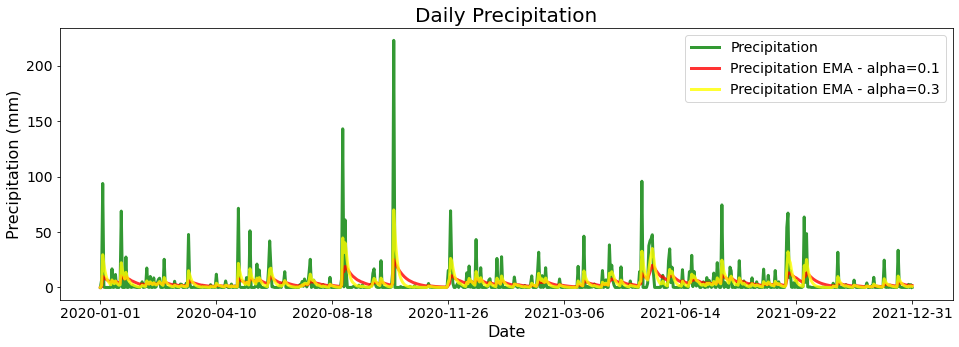

In [12]:
# green - Precipitation, red- Precipitation with smoothing factor - 0.1, yellow - Precipitation with smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
data_plotting[['PRCP_mm', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(16,5), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Precipitation', 'Precipitation EMA - alpha=0.1', 'Precipitation EMA - alpha=0.3'], fontsize=14)
plt.title('Daily Precipitation', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (mm)', fontsize=16)

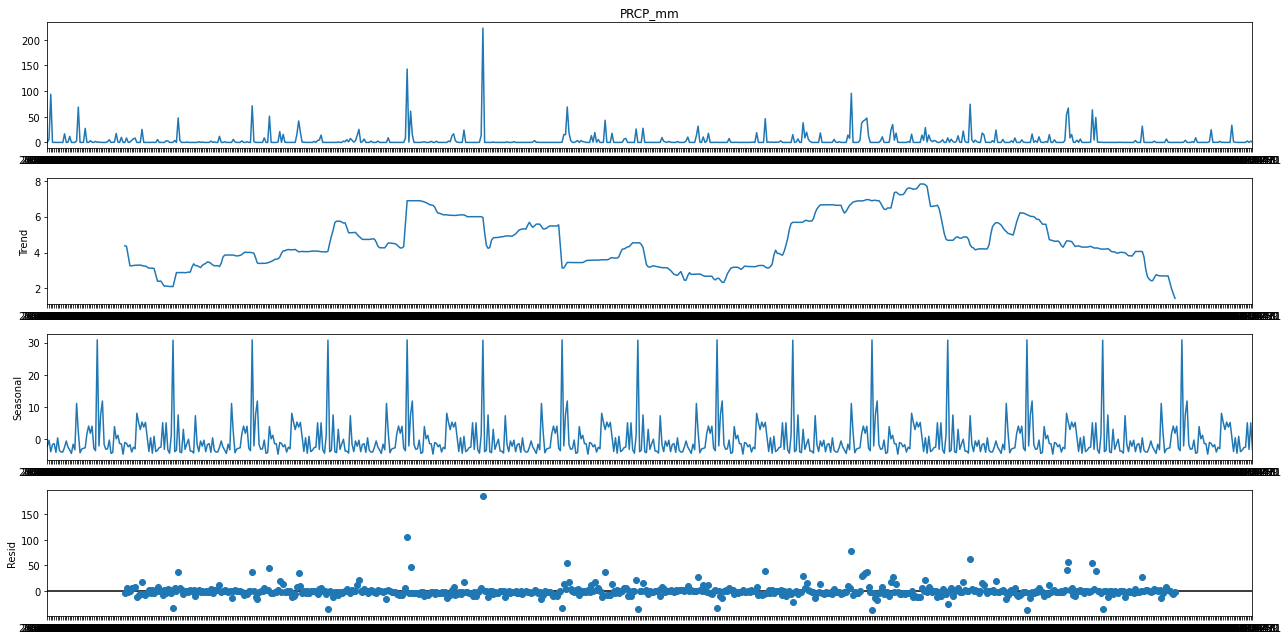

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data_plotting['PRCP_mm'],model='additive', period=90)
fig = decompose.plot()
fig.set_size_inches((18, 9))
fig.tight_layout()
plt.show()